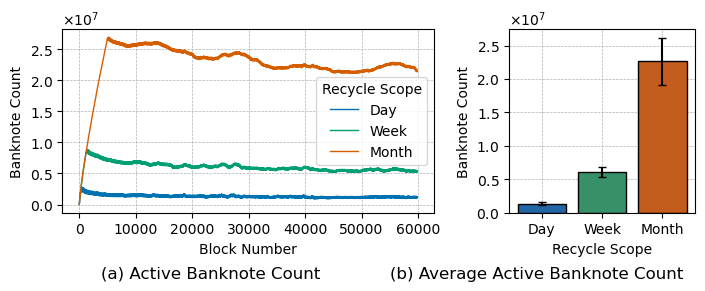

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
Paper_fig_location="/Users/mzy/Documents/本地写论文/PurseChain_ICDE_修回/figures/"

# 读取CSV文件
df_day = pd.read_csv('BanknoteCirculationExperimentData/day.csv')
df_week = pd.read_csv('BanknoteCirculationExperimentData/week.csv')
df_month = pd.read_csv('BanknoteCirculationExperimentData/month.csv')
plt.style.use('seaborn-v0_8-colorblind')

# 参数
LineWidth = 1
SMASize = 10

# 设置图像的尺寸为SCI双栏宽度：两个子图，左右排
fig, axs = plt.subplots(1, 2, figsize=(6.5*1.1,3*1.1), width_ratios=[2, 1])  # 宽度调整为 8.2 以适配双栏

# 设置y轴为科学计数法
def set_scientific(ax):
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.yaxis.get_offset_text().set_fontsize(10)

# 平滑函数
def smooth_data(df, column, window=SMASize):
    return df[column].rolling(window=window, min_periods=1).mean()

# 计算平滑数据
# df_day['active_banknotes_count_smoothed'] = smooth_data(df_day, 'active_banknotes_count')
# df_week['active_banknotes_count_smoothed'] = smooth_data(df_week, 'active_banknotes_count')
# df_month['active_banknotes_count_smoothed'] = smooth_data(df_month, 'active_banknotes_count')

# --- (a) 折线图 ---
axs[0].plot(df_day['block_number'], df_day['active_banknotes_count'], label='Day', linewidth=LineWidth)
axs[0].plot(df_week['block_number'], df_week['active_banknotes_count'], label='Week', linewidth=LineWidth)
axs[0].plot(df_month['block_number'], df_month['active_banknotes_count'], label='Month', linewidth=LineWidth)
axs[0].set_xlabel('Block Number')
axs[0].set_ylabel('Banknote Count')
axs[0].set_title('(a) Active Banknote Count', y=-0.4,x=0.4)
axs[0].legend(title="Recycle Scope")
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5,zorder=1)
set_scientific(axs[0])

# --- (b) 柱状图 ---
means = [
    df_day['active_banknotes_count'].mean(),
    df_week['active_banknotes_count'].mean(),
    df_month['active_banknotes_count'].mean()
]
stds = [
    df_day['active_banknotes_count'].std(),
    df_week['active_banknotes_count'].std(),
    df_month['active_banknotes_count'].std()
]
labels = ['Day', 'Week', 'Month']
x = np.arange(len(labels))
plt.style.use('seaborn-v0_8-colorblind')

axs[1].grid(True, which='both', linestyle='--', linewidth=0.5,zorder=1)

axs[1].bar(x, means, yerr=stds, capsize=3, edgecolor='black',color=[ '#2266A5', '#389069','#C35C1C'],width=0.8,zorder=2)

axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].set_ylabel('Banknote Count')
axs[1].set_xlabel('Recycle Scope')
axs[1].set_title('(b) Average Active Banknote Count',  y=-0.4,x=0.15)
set_scientific(axs[1])

# 布局调整
plt.tight_layout()
# plt.subplots_adjust(top=0.9)

# 保存
plt.savefig(Paper_fig_location+'Active_Banknote_total.pdf', dpi=300,format='pdf')
# plt.savefig(Paper_fig_location+'Active_Banknote_total.jpg', dpi=300)


plt.show()

BG交易月比日下降了多少 51.117455360921696 %


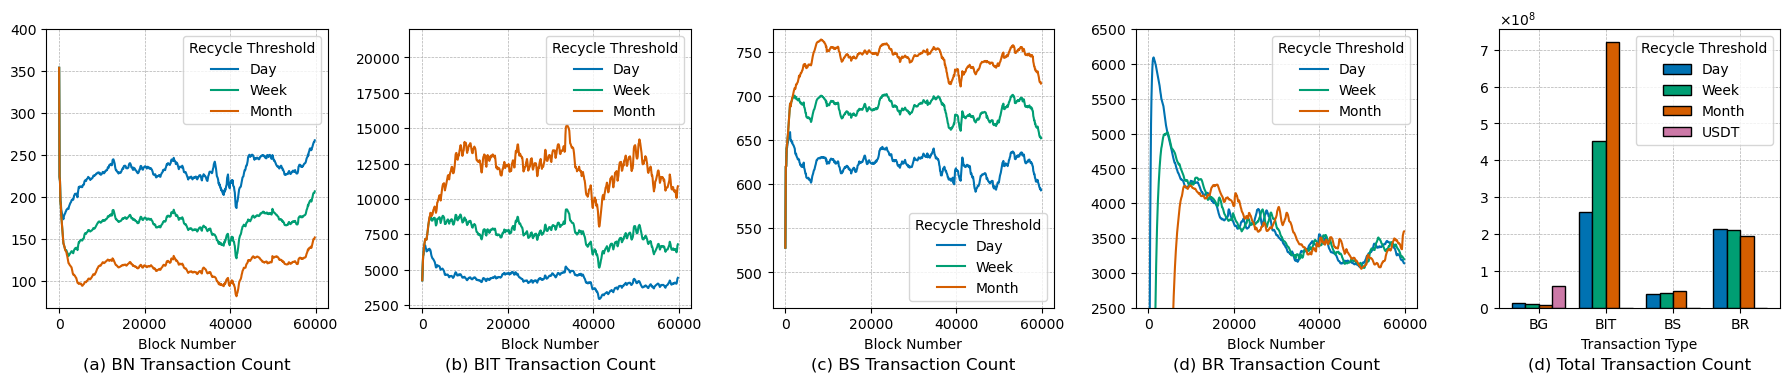

BG交易月比日下降了多少 0.4888254463907831


In [2]:
#交易分布情况-每个区块中交易种类的数量
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# 读取CSV文件
df_day = pd.read_csv('BanknoteCirculationExperimentData/day.csv')
df_week = pd.read_csv('BanknoteCirculationExperimentData/week.csv')
df_month = pd.read_csv('BanknoteCirculationExperimentData/month.csv')
# plt.rcParams['font.family'] = 'Times New Roman'
wid_fig=16
# fig, axs = plt.subplots(1, 4, figsize=(wid_fig, wid_fig/4))
# 设置图像的尺寸，以适应SCI双栏图片
fig, axs = plt.subplots(1, 5, figsize=(18,4))

LineWidth = 1.5
MakerSize = 1
SMASize=1000

plt.style.use('seaborn-v0_8-colorblind')

# 设置y轴为10的幂次显示
def set_scientific(ax):
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # 使用数学文本格式
    ax.yaxis.get_offset_text().set_fontsize(10)  # 可选：调整显示格式的字体大小

# 定义一个平滑函数，使用SMA进行平滑
def smooth_data(df, column, window=SMASize):
    # return df[column].rolling(window=window, min_periods=1).mean()
    return df[column].ewm(alpha=0.0008).mean()

# 对每个数据列应用SMA平滑
df_day['block_new_smoothed'] = smooth_data(df_day, 'block_new')
df_week['block_new_smoothed'] = smooth_data(df_week, 'block_new')
df_month['block_new_smoothed'] = smooth_data(df_month, 'block_new')

df_day['block_transfer_smoothed'] = smooth_data(df_day, 'block_transfer')
df_week['block_transfer_smoothed'] = smooth_data(df_week, 'block_transfer')
df_month['block_transfer_smoothed'] = smooth_data(df_month, 'block_transfer')

df_day['block_split_smoothed'] = smooth_data(df_day, 'block_split')
df_week['block_split_smoothed'] = smooth_data(df_week, 'block_split')
df_month['block_split_smoothed'] = smooth_data(df_month, 'block_split')

df_day['block_recycle_smoothed'] = smooth_data(df_day, 'block_recycle')
df_week['block_recycle_smoothed'] = smooth_data(df_week, 'block_recycle')
df_month['block_recycle_smoothed'] = smooth_data(df_month, 'block_recycle')

#为了防止采样点过多导致pdf打开速度过慢
df_day = df_day.iloc[::100, :]
df_week = df_week.iloc[::100, :]
df_month = df_month.iloc[::100, :]


# 绘制平滑后的曲线
axs[0].plot(df_day['block_number'], df_day['block_new_smoothed'], label='Day', linewidth=LineWidth)
axs[0].plot(df_week['block_number'], df_week['block_new_smoothed'], label='Week', linewidth=LineWidth)
axs[0].plot(df_month['block_number'], df_month['block_new_smoothed'], label='Month', linewidth=LineWidth)
axs[0].set_title('(a) BN Transaction Count', y=-0.25)
axs[0].set_ylim(top=400) 
axs[0].set_xlabel('Block Number')
# axs[0].set_ylabel('New Banknote Count')
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5,zorder=1)
axs[0].legend(title="Recycle Threshold")


  # 设置y轴为科学计数法

axs[1].plot(df_day['block_number'], df_day['block_transfer_smoothed'], label='Day', linewidth=LineWidth)
axs[1].plot(df_week['block_number'], df_week['block_transfer_smoothed'], label='Week', linewidth=LineWidth)
axs[1].plot(df_month['block_number'], df_month['block_transfer_smoothed'], label='Month', linewidth=LineWidth)
axs[1].set_title('(b) BIT Transaction Count', y=-0.25)
axs[1].set_xlabel('Block Number')
axs[1].set_ylim(top=22000) 
# axs[1].set_ylabel('Transferred Banknote Count')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5,zorder=1)
axs[1].legend(title="Recycle Threshold")
set_scientific(axs[1])  # 设置y轴为科学计数法

axs[2].plot(df_day['block_number'], df_day['block_split_smoothed'], label='Day', linewidth=LineWidth)
axs[2].plot(df_week['block_number'], df_week['block_split_smoothed'], label='Week', linewidth=LineWidth)
axs[2].plot(df_month['block_number'], df_month['block_split_smoothed'], label='Month', linewidth=LineWidth)
axs[2].set_title('(c) BS Transaction Count', y=-0.25)
axs[2].set_xlabel('Block Number')
axs[2].set_ylim(bottom=460) 
# axs[2].set_ylabel('Splitted Banknote Count')
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5,zorder=1)
axs[2].legend(title="Recycle Threshold")
set_scientific(axs[2])  # 设置y轴为科学计数法

axs[3].plot(df_day['block_number'], df_day['block_recycle_smoothed'], label='Day', linewidth=LineWidth)
axs[3].plot(df_week['block_number'], df_week['block_recycle_smoothed'], label='Week', linewidth=LineWidth)
axs[3].plot(df_month['block_number'], df_month['block_recycle_smoothed'], label='Month', linewidth=LineWidth)
axs[3].set_title('(d) BR Transaction Count', y=-0.25)
axs[3].set_ylim(2500, 6500)
axs[3].set_xlabel('Block Number')
# axs[3].set_ylabel('Recycled Banknote Count')
axs[3].grid(True, which='both', linestyle='--', linewidth=0.5,zorder=1)
axs[3].legend(title="Recycle Threshold")
set_scientific(axs[3])  # 设置y轴为科学计数法


# 读取CSV文件
df_day = pd.read_csv('BanknoteCirculationExperimentData/day.csv')
df_week = pd.read_csv('BanknoteCirculationExperimentData/week.csv')
df_month = pd.read_csv('BanknoteCirculationExperimentData/month.csv')

# 设置字体与保存路径
# plt.rcParams['font.family'] = 'Times New Roman'

# 提取最后一行数据
last_day = df_day.iloc[-1]
last_week = df_week.iloc[-1]
last_month = df_month.iloc[-1]
last_raw_value = df_month.iloc[-1]["processed_raw_txs"]
# 数据准备
labels = ['BG', 'BIT', 'BS', 'BR']
day_values = [
    last_day['total_new'], last_day['total_transfer'],
    last_day['total_split'], last_day['total_recycle']
]
week_values = [
    last_week['total_new'], last_week['total_transfer'],
    last_week['total_split'], last_week['total_recycle']
]
month_values = [
    last_month['total_new'], last_month['total_transfer'],
    last_month['total_split'], last_month['total_recycle']
]
last_raw_values=[last_raw_value,0,0,0]
x = np.arange(len(labels))  # 类别位置
width = 0.20  # 每组柱子的宽度

num_groups = 4  # 总共4组：Day, Week, Month, Raw
total_width = width * num_groups
offsets = [-1.5, -0.5, 0.5, 1.5]  # 对应于 Day, Week, Month, Raw 的位置偏移

# ax.bar(x + offsets[0] * width, day_values, width, label='Day')
# ax.bar(x + offsets[1] * width, week_values, width, label='Week')
# ax.bar(x + offsets[2] * width, month_values, width, label='Month')
# ax.bar(x + offsets[3] * width, last_raw_values, width, label='Raw')
# # 绘制三组柱状图
axs[4].bar(x+offsets[0] * width, day_values, width, label='Day', edgecolor='black',zorder=2)
axs[4].bar(x+offsets[1] * width, week_values, width, label='Week', edgecolor='black',zorder=2)
axs[4].bar(x+offsets[2] * width, month_values, width, label='Month', edgecolor='black',zorder=2)
axs[4].bar(x+offsets[3] * width, last_raw_values, width, label='USDT', edgecolor='black',zorder=2)
# 设置标签
axs[4].set_xlabel('Transaction Type')
# axs[4].set_ylabel('Count')
# axs[4].set_title('Total Banknote Transactions by Type and Time Scale')
# ransactions by Type and Time Scale')
axs[4].set_xticks(x)
axs[4].set_xticklabels(labels)
axs[4].legend(title="Recycle Threshold")
axs[4].set_title('(d) Total Transaction Count', y=-0.25)

# axs[4].grid(axis='y', linestyle='--', linewidth=0.5)
axs[4].grid(True, which='both', linestyle='--', linewidth=0.5,zorder=1)

set_scientific(axs[4])  # 设置y轴为科学计数法
# plt.tight_layout()
 
aaa=1-(last_day['total_new']-last_month["total_new"])/last_day['total_new']
print("BG交易月比日下降了多少",aaa*100, "%")


# 调整布局，避免重叠
plt.tight_layout()

# 保存为jpg格式
# plt.savefig('Banknote_status_each_block.pdf', dpi=300,format='pdf')
plt.savefig(Paper_fig_location+'Banknote_status_each_block.pdf', dpi=300,format='pdf')

# 显示图像
plt.show()

print("BG交易月比日下降了多少",(df_day['block_new'].mean()-df_month['block_new'].mean())/df_day['block_new'].mean())



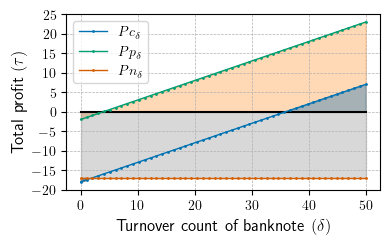

In [3]:
#BN费率计算
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-colorblind')

plt.gcf().set_size_inches(4, 2.5)  # 图像宽度4英寸，高度2.8英寸（适合双栏单列）

# plt.rcParams['font.family'] = 'Times New Roman'
END=50
# 创建 t 的取值范围
t = np.linspace(0, END, END)

# 根据给定的公式计算 y1, y2 和 y3
y1 = -(2 + 16) + 0.5 * t
y2 = (-2 ) + 0.5 * t
y3 = -(17)

# 启用 LaTeX 渲染
plt.rc('text', usetex=True)

# 创建图形
plt.plot(t, np.zeros_like(t), color='black', linewidth=1.5)  # 这里绘制 y=0 的加粗线

plt.plot(t, y1, label=r'$Pc_{\delta}$', linewidth=1, marker='o', markersize=1)
plt.plot(t, y2, label=r'$Pp_{\delta}$', linewidth=1, marker='o', markersize=1)
plt.plot(t, [y3] * len(t), label=r'$Pn_{\delta}$', linewidth=1, marker='o', markersize=1)


plt.fill_between(t, y2,0, color='tab:orange', alpha=0.3)

plt.fill_between(t, y1,0,where=(y1 >0 ), color='tab:blue', alpha=0.4)

plt.fill_between(t, y1,  y3,where=(y1 < y3 ), color='gray', alpha=0.9)

plt.fill_between(t, y3,  0, color='gray', alpha=0.3)

plt.xticks(np.arange(0, END+1, 10))  # 每5个单位显示一个标签

# 添加图例
plt.legend()

# 设置标签和标题
plt.xlabel(r'Turnover count of banknote $(\delta)$', fontsize=12)
plt.ylabel(r'Total profit $(\tau)$', fontsize=12)

# 显示网格
plt.grid(True, which='both', linestyle='--', linewidth=0.5,zorder=1)

# 设置图像的大小和分辨率，适应双栏单列
plt.tight_layout()

plt.yticks(np.arange(-20, 26, 5))  # 纵轴每隔5有一个标签
plt.savefig(Paper_fig_location+'line_plot_with_shading.pdf', dpi=300, bbox_inches='tight',format='pdf')
# plt.savefig('line_plot_with_shading.pdf', dpi=300, bbox_inches='tight',format='pdf')

# 显示图形
plt.show()
plt.rc('text', usetex=False)


In [4]:


import pandas as pd

# 定义 CSV 文件路径
csv_file = "BanknoteCirculationExperimentData/banknote_info.csv"
df = pd.read_csv(csv_file, usecols=["bn_turnover_count"])

0.6294996092197633 0.30736634528433365 0.06313404549590304


/var/folders/n7/7c46n38164n95ll_z68ccbl40000gn/T/ipykernel_10088/3823662320.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


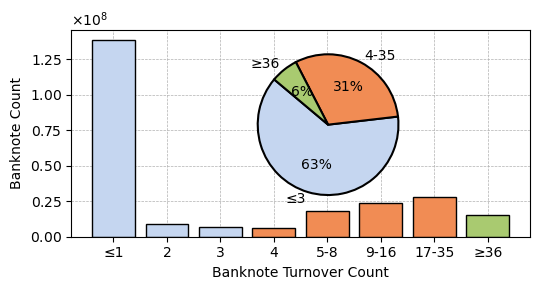

In [5]:
A_color="#C5D6F0"
B_color="#F18C54"
C_color="#A9CA70"

# 定义自定义的区间
bins = [-1,1,2,3 ,4, 8, 16, 35, float("inf")]
labels = ["[0,1]","(1,2]","(2,3]","(3,4]", "(4,8]", "(8,16]", "(16,31]", "[32,inf)"]
labels = ["≤1","2","3","4", "5-8", "9-16", "17-35", "≥36"]

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rc('text', usetex=False)



df["category"] = pd.cut(df["bn_turnover_count"], bins=bins, labels=labels)

# 计算每个区间的频次
hist_data = df["category"].value_counts().sort_index()

# 绘制直方图
fig, ax = plt.subplots(figsize=(5.5, 3))
ax.bar(hist_data.index, hist_data.values, color=[A_color,A_color,A_color,B_color, B_color,B_color,B_color, C_color], edgecolor="black",zorder=2)
ax.set_xlabel("Banknote Turnover Count")
ax.set_ylabel("Banknote Count")
plt.tight_layout()

# ax.set_title("Histogram of bn_turnover_count (Custom Ranges)")
ax.grid(True, which='both', linestyle='--', linewidth=0.5,zorder=1)
set_scientific(ax)
ax_inset = inset_axes(ax, width="85%", height="85%", loc="upper right")  # 调整大小和位置

labels = ["≤3", "4-35", "≥36"]
# # 计算各区间的数量和比例
total_count = len(df)
count_0_16 = len(df[df["bn_turnover_count"] <= 3])
count_16_32 = len(df[(df["bn_turnover_count"] >=4) & (df["bn_turnover_count"] <= 35)])
count_greater_32 = len(df[df["bn_turnover_count"] >= 36])
# # 计算比例
proportion_0_16 = count_0_16 / total_count
proportion_16_32 = count_16_32 / total_count
proportion_greater_32 = count_greater_32 / total_count
print(proportion_0_16, proportion_16_32, proportion_greater_32)
sizes = [proportion_0_16, proportion_16_32, proportion_greater_32]
ax_inset.pie(sizes, labels=labels, autopct=lambda pct: f'{round(pct):.0f}%', startangle=140, colors=[A_color, B_color, C_color], wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
# plt.savefig('turnover.pdf', dpi=300,format='pdf')
plt.savefig(Paper_fig_location+'turnover.pdf', dpi=300,format='pdf')
plt.tight_layout()

# 显示图表
plt.show()


In [6]:
top5_rows = df.nlargest(5, "bn_turnover_count")

In [7]:
top5_rows

,bn_turnover_count,category
0,1096.0,≥36
1,579.0,≥36
2,403.0,≥36
3,274.0,≥36
4,274.0,≥36
